In [1]:
import pandas as pd
df = pd.read_csv('computer_equipment_prices.csv')
df.head()

,Product ID,Category,Brand,Model,Price (USD),Stock,Supplier,Date Manufactured
0,17665402-0b33-4147-b469-dfd125a5a12f,Motherboard,Corsair,Corsair Motherboard Model-3733,152.03,496,ComputeMart,2-17-2022
1,5dd8d1c5-a1fa-4b35-be0c-c3996fa5e548,Wi-Fi Adapter,ASUS,ASUS Wi-Fi Adapter Model-8365,48.36,328,ComputeMart,12-04-2013
2,10070d9e-0bb8-4537-88ff-85699ce7e6b9,Network Switch,Seagate,Seagate Network Switch Model-5659,427.56,359,TechWorld,6-15-2021
3,8194cdec-f222-4643-9f38-1f39b52c389d,Power Supply,Seagate,Seagate Power Supply Model-5938,67.40,484,ComputeMart,4-15-2013
4,a77c4c3a-fc89-4c5a-af08-410c55983b12,Monitor,Intel,Intel Monitor Model-6348,253.03,203,GadgetDepot,7-19-2021


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product ID         600 non-null    object 
 1   Category           600 non-null    object 
 2   Brand              600 non-null    object 
 3   Model              600 non-null    object 
 4   Price (USD)        600 non-null    float64
 5   Stock              600 non-null    int64  
 6   Supplier           600 non-null    object 
 7   Date Manufactured  600 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 37.6+ KB


In [3]:
df.describe()

,Price (USD),Stock
count,600.000000,600.000000
mean,418.794633,256.278333
std,546.280802,143.845160
min,8.350000,0.000000
25%,97.382500,132.750000
50%,221.690000,259.000000
75%,435.942500,379.250000
max,2950.580000,500.000000


In [4]:
# Coversion of Date Manufactured data type from object to datetime
df['Date Manufactured'] = pd.to_datetime(df['Date Manufactured'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Product ID         600 non-null    object        
 1   Category           600 non-null    object        
 2   Brand              600 non-null    object        
 3   Model              600 non-null    object        
 4   Price (USD)        600 non-null    float64       
 5   Stock              600 non-null    int64         
 6   Supplier           600 non-null    object        
 7   Date Manufactured  600 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 37.6+ KB


In [5]:
df.isna().sum()

Product ID           0
Category             0
Brand                0
Model                0
Price (USD)          0
Stock                0
Supplier             0
Date Manufactured    0
dtype: int64

In [6]:
df.columns

Index(['Product ID', 'Category', 'Brand', 'Model', 'Price (USD)', 'Stock',
       'Supplier', 'Date Manufactured'],
      dtype='object')

In [7]:
print("Category : ",df['Category'].nunique())
print("Brand : ",df['Brand'].nunique())
print("Model : ",df['Model'].nunique())
print("Supplier : ",df['Supplier'].nunique())

Category :  20
Brand :  20
Model :  600
Supplier :  5


In [8]:
# For product age in years
from datetime import datetime

today = pd.Timestamp.today()
df['Product Age (Years)'] = (today - df['Date Manufactured']).dt.days // 365
df.head()

,Product ID,Category,Brand,Model,Price (USD),Stock,Supplier,Date Manufactured,Product Age (Years)
0,17665402-0b33-4147-b469-dfd125a5a12f,Motherboard,Corsair,Corsair Motherboard Model-3733,152.03,496,ComputeMart,2022-02-17,3
1,5dd8d1c5-a1fa-4b35-be0c-c3996fa5e548,Wi-Fi Adapter,ASUS,ASUS Wi-Fi Adapter Model-8365,48.36,328,ComputeMart,2013-12-04,11
2,10070d9e-0bb8-4537-88ff-85699ce7e6b9,Network Switch,Seagate,Seagate Network Switch Model-5659,427.56,359,TechWorld,2021-06-15,3
3,8194cdec-f222-4643-9f38-1f39b52c389d,Power Supply,Seagate,Seagate Power Supply Model-5938,67.40,484,ComputeMart,2013-04-15,12
4,a77c4c3a-fc89-4c5a-af08-410c55983b12,Monitor,Intel,Intel Monitor Model-6348,253.03,203,GadgetDepot,2021-07-19,3


### Distribution of Product Age(Years)

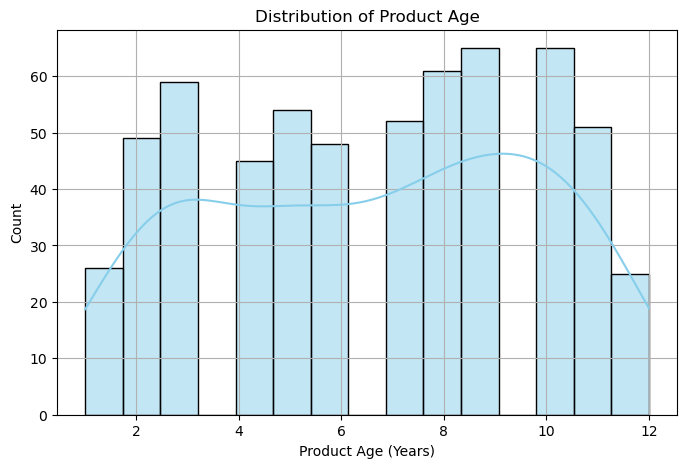

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Product Age (Years)'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Product Age')
plt.xlabel('Product Age (Years)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


### Average Price vs. Product Age

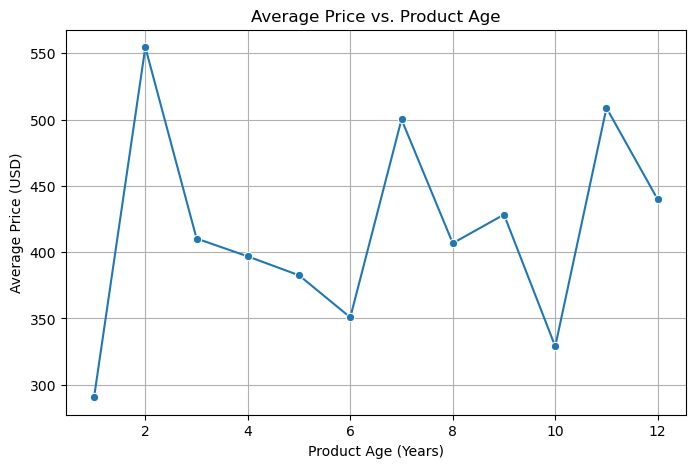

In [10]:
age_price = df.groupby('Product Age (Years)')['Price (USD)'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=age_price, x='Product Age (Years)', y='Price (USD)', marker='o')
plt.title('Average Price vs. Product Age')
plt.xlabel('Product Age (Years)')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.show()


### Average Price by Category

C:\Users\niles\AppData\Local\Temp\ipykernel_14820\1176381369.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_price.values, y=category_price.index, palette='viridis')


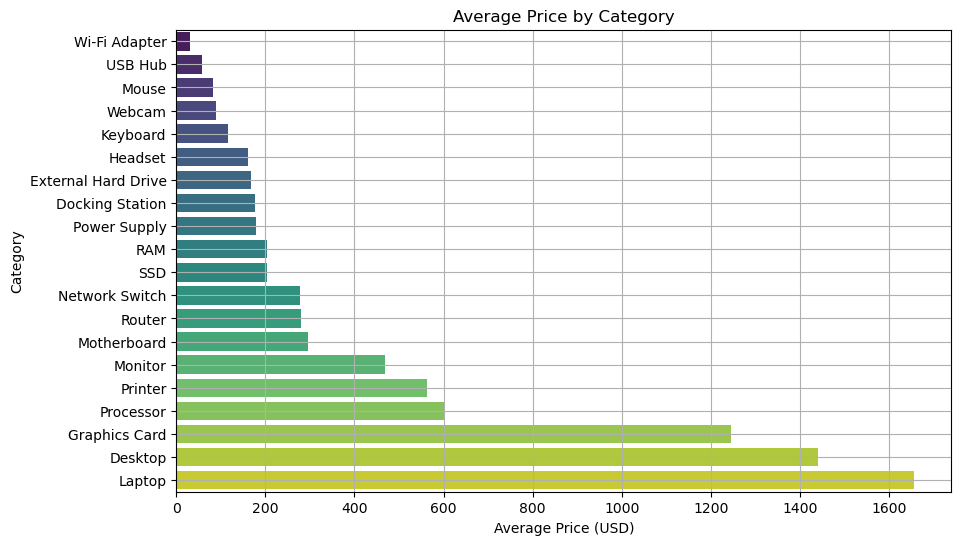

In [11]:
category_price = df.groupby('Category')['Price (USD)'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_price.values, y=category_price.index, palette='viridis')
plt.title('Average Price by Category')
plt.xlabel('Average Price (USD)')
plt.ylabel('Category')
plt.grid(True)
plt.show()


### Boxplot of Prices by Brand

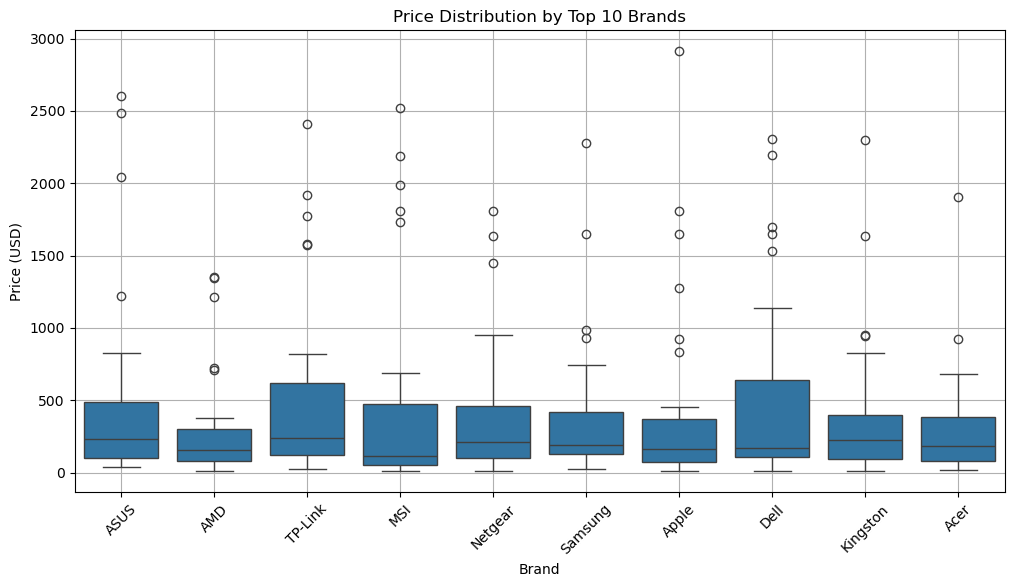

In [12]:
top_brands = df['Brand'].value_counts().nlargest(10).index
filtered = df[df['Brand'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered, x='Brand', y='Price (USD)')
plt.title('Price Distribution by Top 10 Brands')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Relationships between numerical features

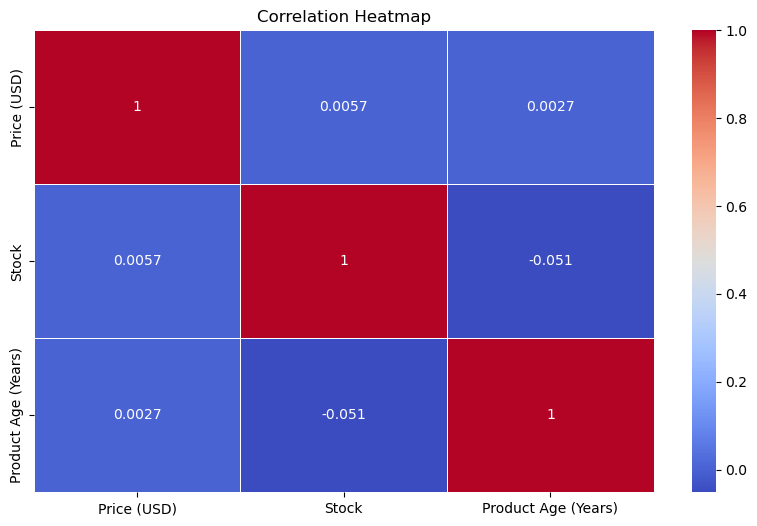

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### Pairplot for Key Variables

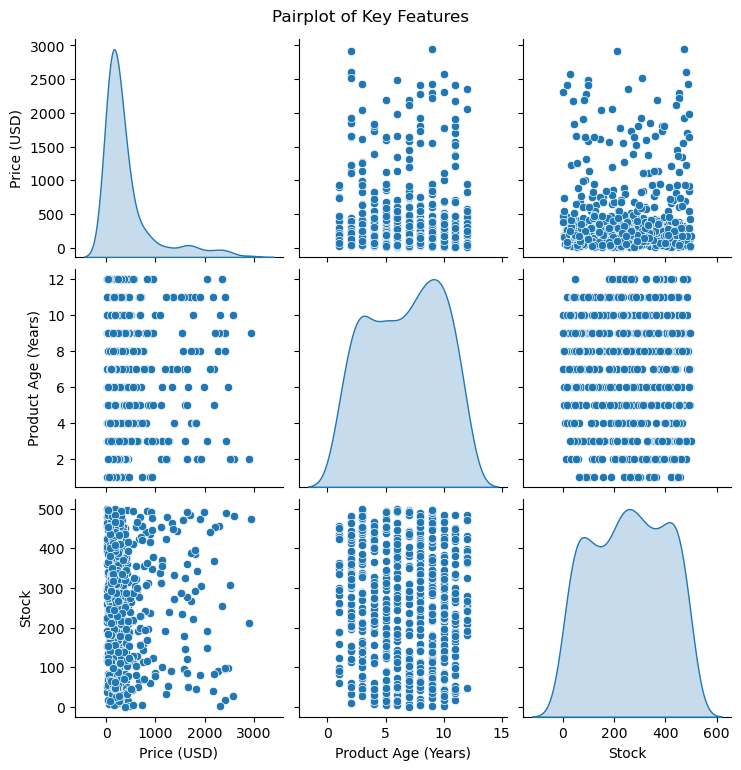

In [14]:
sns.pairplot(df[['Price (USD)', 'Product Age (Years)', 'Stock']], diag_kind='kde')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()


### Outlier Detection using Boxplots

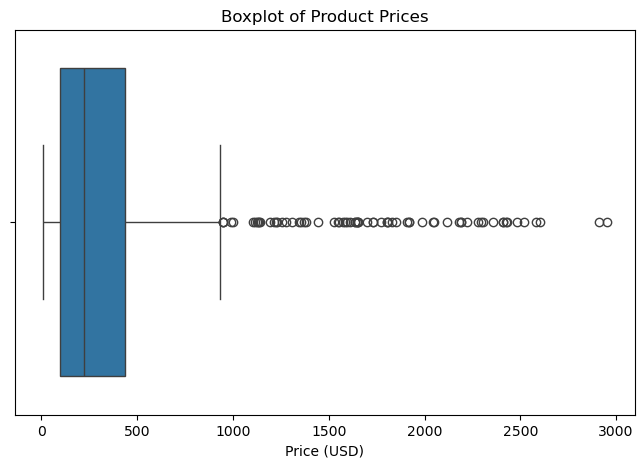

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price (USD)'])
plt.title('Boxplot of Product Prices')
plt.show()


### Category-Brand Price Heatmap

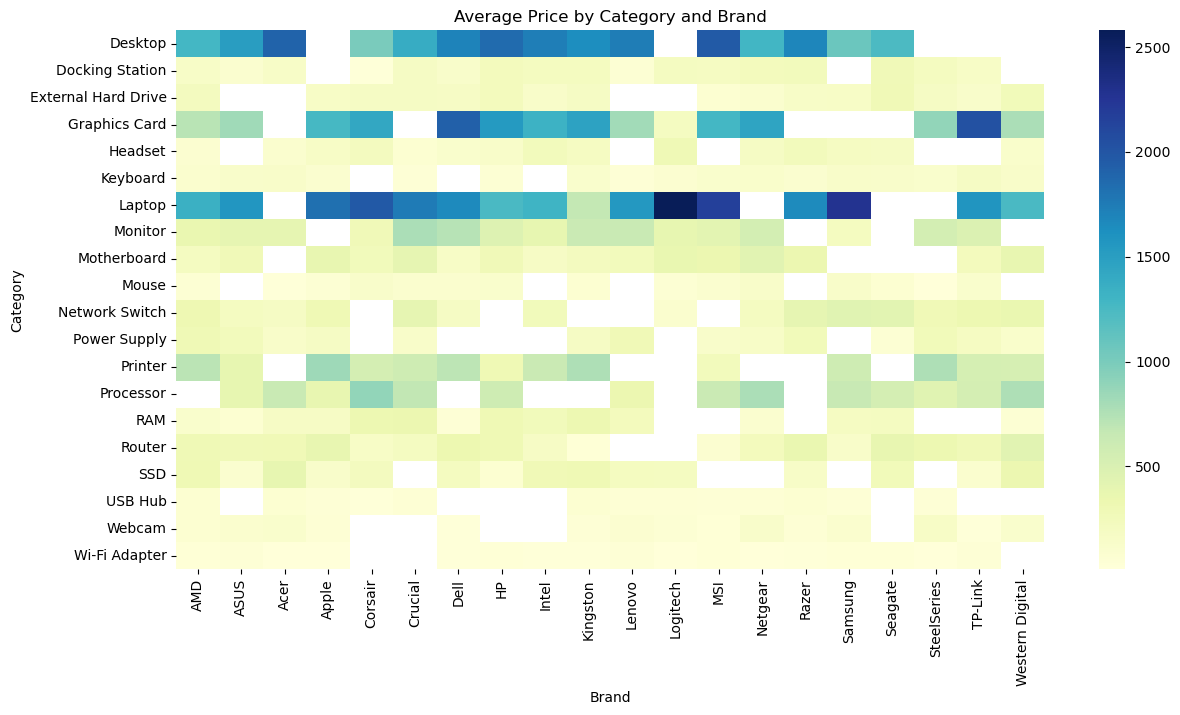

In [16]:
pivot = df.pivot_table(values='Price (USD)', index='Category', columns='Brand', aggfunc='mean')
plt.figure(figsize=(14, 7))
sns.heatmap(pivot, cmap='YlGnBu', annot=False)
plt.title('Average Price by Category and Brand')
plt.show()


In [17]:
# Preprocessing and Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

features = ['Product Age (Years)', 'Stock', 'Brand', 'Category', 'Supplier']
df_encoded = pd.get_dummies(df[features], drop_first=True)

X = df_encoded
y = df['Price (USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)


In [18]:
# Multiple Models Setup
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Linear Regression': LinearRegression()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results[name] = {'MAE': mae, 'R2': r2}

results_df = pd.DataFrame(results).T
print(results_df)


                                 MAE        R2
Random Forest             235.645303  0.505023
Support Vector Regressor  314.261060 -0.062837
Linear Regression         172.425164  0.766173


In [19]:
# Cross Validated model Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Cross-validation
lr = LinearRegression()
cv_r2 = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
cv_mae = -cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

print("Cross-Validated R²:", np.mean(cv_r2).round(4))
print("Cross-Validated MAE:", np.mean(cv_mae).round(4))


Cross-Validated R²: 0.6431
Cross-Validated MAE: 185.7482


In [20]:
# Hyperparameter Tuning with Ridge and Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(ridge, params, cv=5, scoring='r2')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best Ridge Alpha:", grid.best_params_)


Best Ridge Alpha: {'alpha': 1}


In [21]:
#Final Training and Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Train final model
final_model = LinearRegression()
final_model.fit(X_train, y_train)

# Predict
y_pred = final_model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


R²: 0.7662
MAE: 172.43
RMSE: 291.26


E:\Anaconda_Installations\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


C:\Users\niles\AppData\Local\Temp\ipykernel_14820\3816703630.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.values, y=coefficients.index, palette="coolwarm")


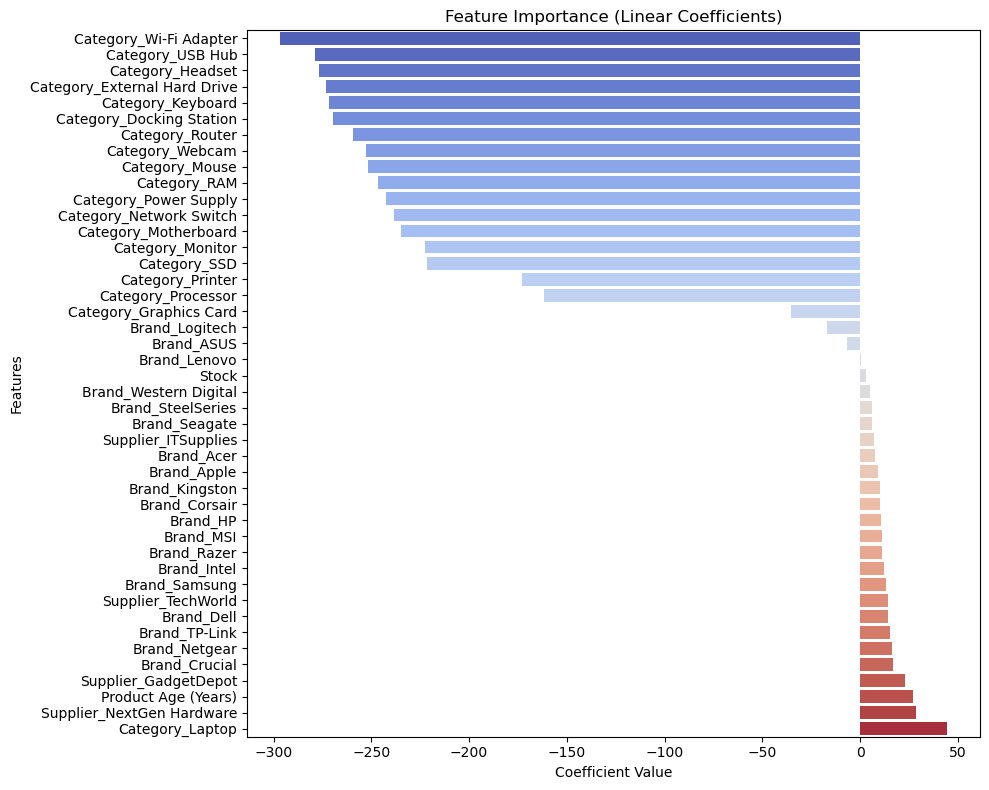

In [22]:
#Feature Importance Plot
import matplotlib.pyplot as plt
import seaborn as sns

coefficients = pd.Series(final_model.coef_, index=X_train.columns).sort_values()
plt.figure(figsize=(10, 8))
sns.barplot(x=coefficients.values, y=coefficients.index, palette="coolwarm")
plt.title("Feature Importance (Linear Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [23]:
# Save the model ,columns and scaler
joblib.dump(final_model, 'best_linear_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(X_train.columns.tolist(), 'feature_columns.joblib')


['feature_columns.joblib']

In [24]:
model = joblib.load('best_linear_model.joblib')
scaler = joblib.load('scaler.joblib')
columns = joblib.load('feature_columns.joblib')
